In [22]:
from PIL import Image
import pandas as pd
import json
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [37]:
file = './annotations.csv'
csv = pd.read_csv(file)
print('--------------------------- All classes in the dataset ---------------------------')
csv['region_attributes'].value_counts()

--------------------------- All classes in the dataset ---------------------------


{"class":"Up"}           11
{"class":"DownRight"}    11
{"class":"Top"}          10
{"class":"Back"}         10
{"class":"UpLeft"}       10
{"class":"DownLeft"}     10
{"class":"Left"}         10
{"class":"Right"}        10
{"class":"Front"}        10
{"class":"UpRight"}      10
{"class":"Down"}          9
Name: region_attributes, dtype: int64

In [38]:
# load data for kmeans 
def load_dataset(csv_file):
    data = []
    for row in csv.iterrows():
        img = Image.open('/home/trinanjan/Desktop/EVA/eva_test/Session16/face_images_merged/{}'.format(row[1]['filename']))
        img_bbox = json.loads(row[1]['region_shape_attributes'])
        # todo -- add img width and hight while creating annotataions   
        # currently size is used from pillow obj        
        width, height = img.size
        xmin,ymin = img_bbox['x'] , img_bbox['y'] , 
        xmax,ymax =  xmin + img_bbox['width'] , ymin + img_bbox['height']
        # normalize values from 0 to 1
        xmin = xmin / width
        ymin = ymin / height
        xmax = xmax / width
        ymax = ymax / height
        # kmenas data         
        data.append([xmax - xmin, ymax - ymin])
    return np.array(data)

In [25]:
# convert the dataset
final_data = load_dataset(csv)
# find kmeans cluster
kmens_cluster = KMeans(n_clusters=4)
kmens_output = kmens_cluster.fit_predict(final_data)

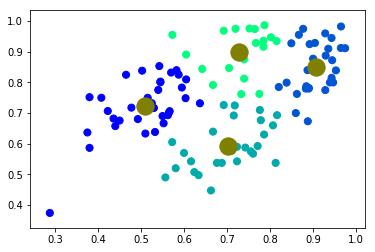

In [26]:
# plot kmeans cluster with centroid points
plt.scatter(final_data[:,0], final_data[:,1],c = kmens_cluster.labels_, s=50, cmap='winter')
plt.scatter(kmens_cluster.cluster_centers_[:, 0], kmens_cluster.cluster_centers_[:, 1], s=300, c='olive')

In [27]:
# final anchor boxes are multiplied by grid size in yolov2 (not sure about yolov3)
final_cluster_size = 13*(kmens_cluster.cluster_centers_)
print(final_cluster_size)

[[ 6.60907027  9.41364109]
 [11.7921423  11.06796026]
 [ 9.13581056  7.69302125]
 [ 9.48019948 11.67948076]]


In [28]:
# sorting anchor boxes according to area
# small ones are used for small obj detection
# medium ones are used for medium obj detection
# larger ones are for large objs 
final_cluster_size = sorted(final_cluster_size,key=lambda x: x[0]* x[1])
print(final_cluster_size)

[array([6.60907027, 9.41364109]), array([9.13581056, 7.69302125]), array([ 9.48019948, 11.67948076]), array([11.7921423 , 11.06796026])]
